In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import pandas as pd

from GyroSolver import*

# Fréquence propre à $50\;\mathrm{Hz}$ :

In [2]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m

x0 =  10 * 1e-2     # m
f_exc = 1.059       # s^-1        
p = np.pi         # rad

f_L_0 = f_exc

params = [g, m, h, J1, J3, x0, p, f_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 50]


Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +6.653
Larmor Frequency (th) :               +1.059
Larmor Period (th) :               +0.944 

Rabi Pulsation (th) :               +1.501
Rabi Period (th) :               +4.185
Temps de montée (th) :               +2.092 

Rapport des pulsations Larmor/Rabi :               +4.431 

Rapport Approx Gyroscopique :             +932.056 



Duration : 0.15121102333068848


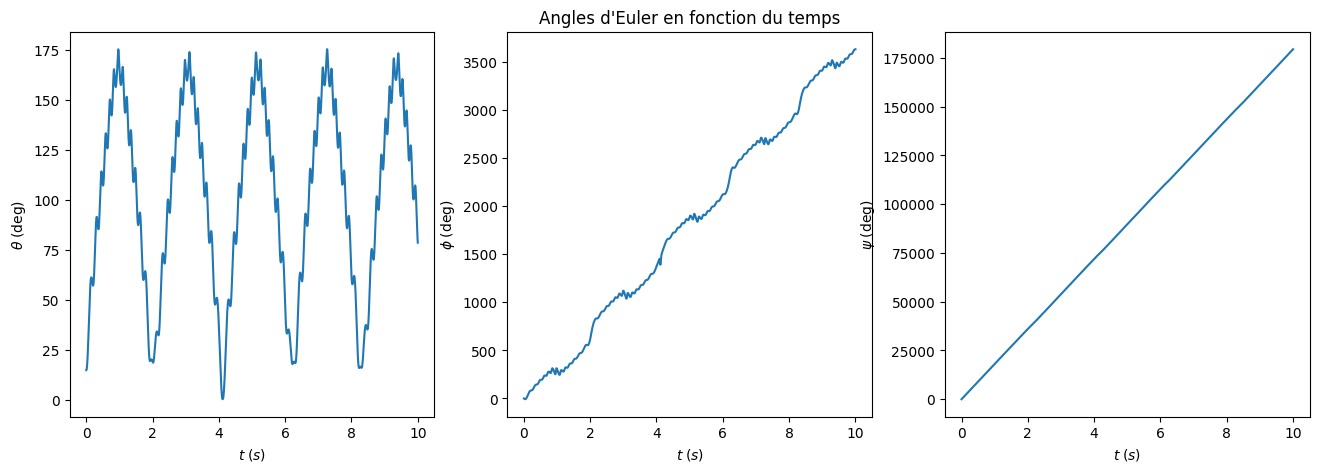

In [3]:
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 10, CI, params, solving_method='RK23', forcing='XY', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

In [12]:
tab_t_burst = np.linspace(0, 20, 51, endpoint=True)
#exc_freq = np.linspace(0.23, 0.31, 26, endpoint=True)

tab_delta = np.linspace(-0.5, 0.5, 51)

exc_freq = tab_delta + f_L_0

print('Estimated time in minutes =', 101 * 51 * 0.2 / 60)
print('Estimated time in hours =', 101 * 51 * 0.2 / 3600)

Estimated time in minutes = 17.17
Estimated time in hours = 0.2861666666666667


In [13]:
t1 = time()
tab_theta_50_X, list_the_50_X, list_t_50_X = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='X')
t2 = time()
print('Duration =', t2 - t1)

Duration = 350.38434386253357


In [14]:
np.savetxt('RabiX_50.txt', tab_theta_50_X)
DF = pd.DataFrame(tab_theta_50_X) 
  
DF.to_csv("RabiX_50.csv")

In [15]:
t1 = time()
tab_theta_50_XY, list_the_50_XY, list_t_50_XY = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='XY')
t2 = time()
print('Duration =', t2 - t1)

Duration = 342.59409284591675


In [16]:
np.savetxt('RabiXY_50.txt', tab_theta_50_XY)
DF = pd.DataFrame(tab_theta_50_XY) 
  
DF.to_csv("RabiXY_50.csv")

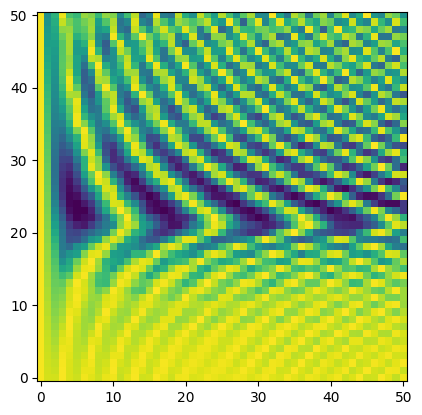

In [17]:
plt.imshow((1 + np.cos(tab_theta_50_X))/ 2, origin='lower')

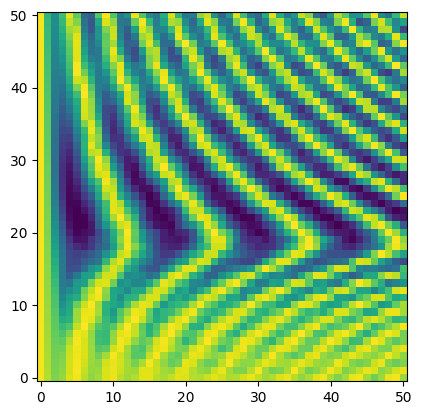

In [11]:
plt.imshow((1 + np.cos(tab_theta_50_X))/ 2, origin='lower')

# Fréquence propre à $100\;\mathrm{Hz}$ :

In [5]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m

x0 =  10 * 1e-2     # m
f_exc = 0.529       # s^-1        
p = np.pi         # rad

f_L_0 = f_exc

params = [g, m, h, J1, J3, x0, p, f_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 100]


Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +3.327
Larmor Frequency (th) :               +0.529
Larmor Period (th) :               +1.889 

Rabi Pulsation (th) :               +0.187
Rabi Period (th) :              +33.543
Temps de montée (th) :              +16.771 

Rapport des pulsations Larmor/Rabi :              +17.759 

Rapport Approx Gyroscopique :           +3_728.223 



Duration : 0.9415879249572754


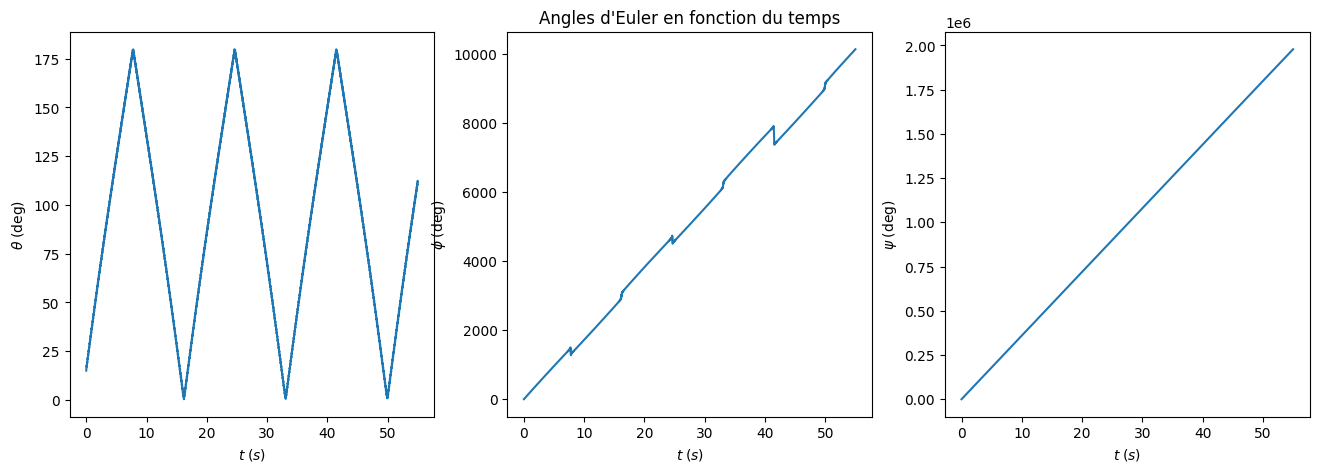

In [6]:
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 55, CI, params, solving_method='RK23', forcing='XY', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t, the, phi, psi)
#path_Forced

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

In [7]:
tab_t_burst = np.linspace(0, 50, 51, endpoint=True)

tab_delta = np.linspace(-0.2, 0.2, 51)

exc_freq = tab_delta + f_L_0

print('Estimated time in minutes =', 51 * 51 * 1 / 60)
print('Estimated time in hours =', 51 * 51 * 1 / 3600)

Estimated time in minutes = 43.35
Estimated time in hours = 0.7225


In [8]:
t1 = time()
tab_theta_100_X, list_the_100_X, list_t_100_X = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='X')
t2 = time()
print('Duration =', t2 - t1)


KeyboardInterrupt



In [ ]:
np.savetxt('RabiX_100.txt', tab_theta_100_X)
DF = pd.DataFrame(tab_theta_100_X) 
  
DF.to_csv("RabiX_100.csv")

In [ ]:
t1 = time()
tab_theta_100_XY, list_the_100_XY, list_t_100_XY = Rabi_Chevron(exc_freq, tab_t_burst, params, CI, 
                                           solving_method='RK23', forcing='XY')
t2 = time()
print('Duration =', t2 - t1)

In [ ]:
np.savetxt('RabiXY_100.txt', tab_theta_100_XY)
DF = pd.DataFrame(tab_theta_100_XY) 
  
DF.to_csv("RabiXY_100.csv")

# Fréquence propre à $200\;\mathrm{Hz}$ :

In [9]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m

x0 =  10 * 1e-2     # m
f_exc = 0.265       # s^-1        
p = np.pi         # rad

f_L_0 = f_exc

params = [g, m, h, J1, J3, x0, p, f_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]


Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.024
Rabi Period (th) :             +267.331
Temps de montée (th) :             +133.666 

Rapport des pulsations Larmor/Rabi :              +70.770 

Rapport Approx Gyroscopique :          +14_912.892 



Duration : 8.496340036392212


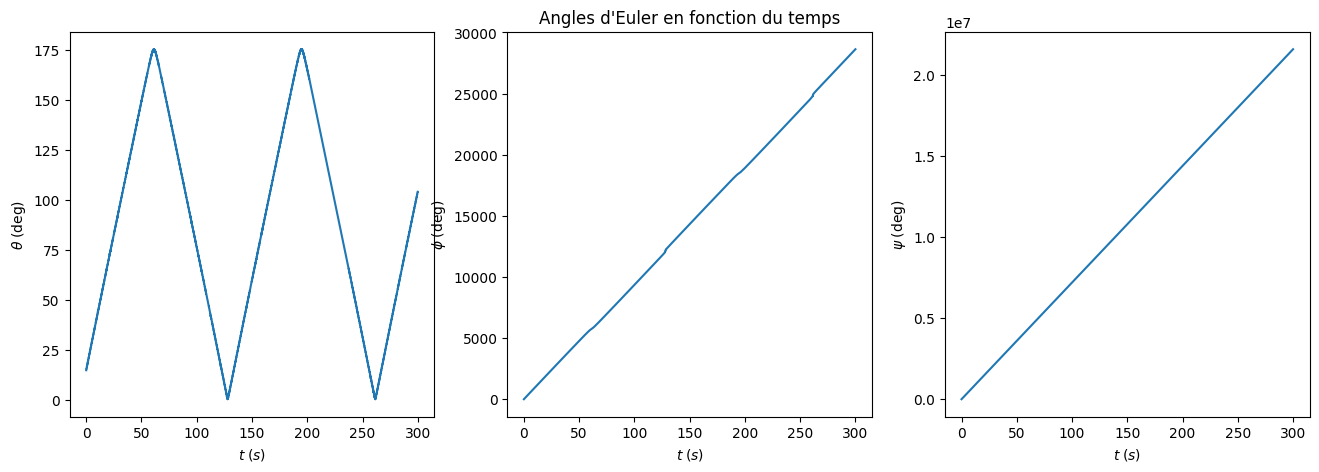

In [14]:
t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro(0, 300, CI, params, solving_method='RK23', forcing='XY', nb_points=10000)
t2 = time()
print('Duration :', t2-t1)

path_Forced = Get_Path(t, the, phi, psi)
#path_Forced

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)